### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np            
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

### Importing the Dataset

In [2]:
df = pd.read_csv('heart-disease.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.shape

(303, 14)

# Attribute Information:

## Only 14 attributes used:
1. Age
2. Sex
3. CP, Chest pain
4. restbp, resting blood pressure(in mm Hg)
5. chol, serum cholesterol in mg/dl
6. fbs, fasting blood sugar
7. restecg, resting electrocardiographic results
8. thalach, maximum heart rate achieved
9. exang, exercise induced angina
10. oldpeak, ST depression induced by exercise relative to rest 
11. slope, the slope of the peak exercise ST segment 
12. ca, number of major vessels (0-3) colored by fluoroscopy 
13. thal, this is short of thalium heart scan.
14. hd, diagnosis of heart disease, the predicted attribute

In [4]:
# checking the columns names before changing 
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [5]:
# changing the column names

df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No of Unique features = ',df[i].nunique())
    print()

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
No of Unique features =  41

sex
[1. 0.]
No of Unique features =  2

cp
[1. 4. 3. 2.]
No of Unique features =  4

restbp
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
No of Unique features =  50

chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 26

#### Now we can see there is a ? in the ca and thal, We want to treat those null values through mode.

In [9]:
df['ca'] = df['ca'].replace('?',df['ca'].mode()[0]).astype(float)

In [10]:
df['thal'] = df['thal'].replace('?',df['thal'].mode()[0]).astype(float)

In [11]:
# now will recheck the [ca and thal] have any missing values are not
print(df.ca.unique())
print(df.thal.unique())

[0. 3. 2. 1.]
[6. 3. 7.]


In [12]:
new_df = df.copy(deep=True)

In [13]:
# Now will split the dataset to the dependent and independent variable 

X=new_df.drop('hd',axis=1)
y=new_df['hd']

### Data Information

- age:- Float
- sex:- category
    - 0 = female
    - 1 = male
- cp:- chest pain, category
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
    - 4 = asymptomatic
- restbp, resting blood pressure(in mm hg), Float
- chol, serum cholesterol in mg/dl, Float
- fbs, fasting blood sugar, Category
    - 0 =  >=120 mpg/dl
    - 1 =  <=120 mpg/dl
- restecg, resting electrocardiographic results, Category
    - 1 = normal
    - 2 = having ST-T wave abnormality
    - 3 = showing probable or definite left ventricular hypertropy
- thalach, maximum heart rate achieved, Float
- exang, exercise induced angina, Category
    - 0 = no
    - 1 = yes
- oldpeak, ST depression induced by exercise relative to rest. Float
- slope, the slope of the peak exercise ST segment, Category
    - 1 = unsloping
    - 2 = flat
    - 3 = downsloping
- ca, number of major vessels (0-3) colored by fluoroscopy, Float
-  thal, thalium heart scan, Category
    - 3 = normal (no cold spots)
    - 6 = fixed defect(cold spots during rest and exercise)
    - 7 = reversible defect(when cold spots only appear during exercise)



### We are going to build simple classification problem here

Now one last thing before we build a classification Tree.  y dosen't just contain 0s and 1s insted, it has 5 different levels of heart disease 0=no heart disease and 1-4 are various degress of heart diseases. we can see thies with unique()

In [14]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [15]:
y.value_counts(normalize = True) * 100

hd
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64

In [16]:
y.value_counts(normalize = True) * 100

hd
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64

In [17]:
#y[y>0] = 1

In [18]:
# y.apply(lambda x : 1  if x >0 else 0)

In [19]:
#y.value_counts()

#### If someone has heart disease we keep it has 1 and if someone don't have heart disease we keep it as 0, so to keep it simple we are coverting multi-class classification problem statement to binary classification

In [20]:
y_non_zero_index= y > 0   # get the index of each non zero values in y
y[y_non_zero_index]=1     # set each non-zero values in y to 1
y.unique()

array([0, 1], dtype=int64)

In [21]:
y.value_counts(normalize = True) *100    # You can see that the dataset is balanced

hd
0    54.125413
1    45.874587
Name: proportion, dtype: float64

## Now will build the model
## Firstly will Build a Preliminary Classification Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# will simply spilt the data into training and testing test set and build the model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
X.columns.to_list()

['age',
 'sex',
 'cp',
 'restbp',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

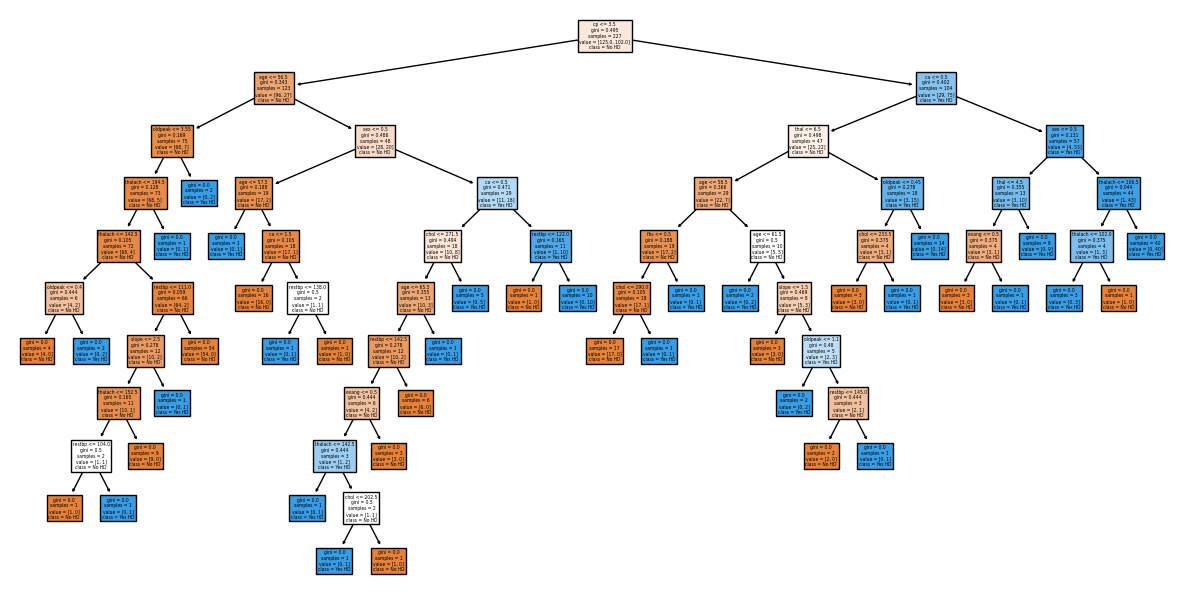

<Figure size 640x480 with 0 Axes>

In [25]:
# Note will plot the tree and see its depth
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model1,filled=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()
plt.savefig('new_image.jpg')


You can see over here the tree is very big because it has built to its complete depth now will prunning the tree if you won't prun the tree it leads to overfitting because its simply learning unwanted things to its complete depth

In [26]:
# Predicting for training and testing 
ytrain_pred = model1.predict(X_train)
ytest_pred = model1.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
# Calculate metrics
accuracy_train = accuracy_score(y_train, ytrain_pred)
accuracy_test = accuracy_score(y_test, ytest_pred)

print(f'Training Score {round(accuracy_train,2)}, Testing Score {round(accuracy_test,2)}')

Training Score 1.0, Testing Score 0.66


In [28]:
# Model Evaluation

train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 1.0, Testing Score 0.66


### You can see that the dataset is overfitted, So we want to use pruning technique to cut down the tree

In [29]:
confusion_matrix(y_train,ytrain_pred)

array([[125,   0],
       [  0, 102]], dtype=int64)

In [30]:
y_test.value_counts()

hd
0    39
1    37
Name: count, dtype: int64

In [31]:
confusion_matrix(y_test,ytest_pred)

array([[24, 15],
       [11, 26]], dtype=int64)

In [32]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       102

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [33]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.63      0.70      0.67        37

    accuracy                           0.66        76
   macro avg       0.66      0.66      0.66        76
weighted avg       0.66      0.66      0.66        76



In [34]:
26+11

37

In [35]:
(26/37)

0.7027027027027027

In the Confusion matrix, We can see that the 24+15 = 39 people that does not have Heart Disease, 61.5%(24/39) correctly classified. And that the 26+11 = 37 people that have Heart Disease, 70.2% correctly classified. 
We can do better than this by overcoming the overfitting issue in the training dataset. So let's prune the tree. 

Pruning:-  In theory it will cut down the tree, If we use pruning it should solve the overfitting problem and give us better results

## Cost Complexity Pruning Part 1: Visualize alpha
    

**Decision Tree** are notorious for being **overfit** to the **Training Dataset,** and there are a lot of parameters, like **max_depth** and **min_samples**, that are improves the accuracy with the **Testing Dataset**.

Pruning a decision Tree is all about finding the right value for the pruning parameter, **alpha**, which controls how little or how much pruning happens.
One way to find the optimal value for **alpha** is to plot the accuracy of the tree as a function of different values. we'll do this for both the **Training Dataset** and the **Testing Dataset**

First, let's extract the different values of **alpha** that are avaliable for this tree and build a pruned tree for each value for **alpha**. **Note :** we omit this maximum value for alpha with **ccp_alphas=ccp_alphas[ : -1]** because it would prune all leaves, leaving us with only a root insted of a tree.

In [36]:
a = model1.cost_complexity_pruning_path(X_train,y_train) 
a

{'ccp_alphas': array([0.        , 0.00293686, 0.00400481, 0.00416055, 0.00430517,
        0.00440529, 0.00453878, 0.00528634, 0.0056478 , 0.00572687,
        0.00660793, 0.00660793, 0.00744519, 0.00788314, 0.00798279,
        0.00800961, 0.00877544, 0.00899446, 0.01488222, 0.0154185 ,
        0.01590662, 0.02686878, 0.02695892, 0.03428884, 0.04838798,
        0.12494069]),
 'impurities': array([0.        , 0.00587372, 0.01388333, 0.02220442, 0.03081476,
        0.03962533, 0.04870289, 0.05927558, 0.06492338, 0.07637712,
        0.08298505, 0.08959298, 0.09703817, 0.11280446, 0.13675283,
        0.14476245, 0.16231333, 0.17130779, 0.18619001, 0.20160852,
        0.23342176, 0.26029054, 0.28724946, 0.3215383 , 0.36992628,
        0.49486697])}

In [37]:
a['ccp_alphas'][0:-1]

array([0.        , 0.00293686, 0.00400481, 0.00416055, 0.00430517,
       0.00440529, 0.00453878, 0.00528634, 0.0056478 , 0.00572687,
       0.00660793, 0.00660793, 0.00744519, 0.00788314, 0.00798279,
       0.00800961, 0.00877544, 0.00899446, 0.01488222, 0.0154185 ,
       0.01590662, 0.02686878, 0.02695892, 0.03428884, 0.04838798])

In [38]:
path=model1.cost_complexity_pruning_path(X_train,y_train)    # determine values for alpha
ccp_alphas= path.ccp_alphas   # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # extract the maximum value for alpha

In [39]:
len(ccp_alphas)

25

In [40]:
models =[]  # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for i in ccp_alphas:
    model2=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model2.fit(X_train,y_train)
    models.append(model2)

In [41]:
# Now the Model has trained with different alpha values
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002936857562408223, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004004805766920304, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00416054821341165, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004305166199439326, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004405286343612336, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004538779869176339, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0052863436123348016, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005647803004631198, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005726872246696036, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006607929515418502, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006607929515418502, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007445191539789264, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007883143983306282, random_state=0),
 DecisionT

Now let's graph the accuracy of the trees using the **Training Dataset** and the **Testing Dataset** as a function of alpha.

In [42]:
penalty = model1.cost_complexity_pruning_path(X_train,y_train)
penalty

{'ccp_alphas': array([0.        , 0.00293686, 0.00400481, 0.00416055, 0.00430517,
        0.00440529, 0.00453878, 0.00528634, 0.0056478 , 0.00572687,
        0.00660793, 0.00660793, 0.00744519, 0.00788314, 0.00798279,
        0.00800961, 0.00877544, 0.00899446, 0.01488222, 0.0154185 ,
        0.01590662, 0.02686878, 0.02695892, 0.03428884, 0.04838798,
        0.12494069]),
 'impurities': array([0.        , 0.00587372, 0.01388333, 0.02220442, 0.03081476,
        0.03962533, 0.04870289, 0.05927558, 0.06492338, 0.07637712,
        0.08298505, 0.08959298, 0.09703817, 0.11280446, 0.13675283,
        0.14476245, 0.16231333, 0.17130779, 0.18619001, 0.20160852,
        0.23342176, 0.26029054, 0.28724946, 0.3215383 , 0.36992628,
        0.49486697])}

In [43]:
alpha_values = penalty['ccp_alphas'][:-1]
alpha_values

array([0.        , 0.00293686, 0.00400481, 0.00416055, 0.00430517,
       0.00440529, 0.00453878, 0.00528634, 0.0056478 , 0.00572687,
       0.00660793, 0.00660793, 0.00744519, 0.00788314, 0.00798279,
       0.00800961, 0.00877544, 0.00899446, 0.01488222, 0.0154185 ,
       0.01590662, 0.02686878, 0.02695892, 0.03428884, 0.04838798])

In [44]:
dt = DecisionTreeClassifier(random_state=0,ccp_alpha=0.026868782163520608)
dt.fit(X_train,y_train)
display(dt.score(X_train,y_train))
display(dt.score(X_test,y_test))

0.8193832599118943

0.8289473684210527

In [45]:
models = []

for i in alpha_values:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model = dt.fit(X_train,y_train)
    models.append(model)

In [46]:
alpha_values[21]

0.026868782163520608

In [49]:
abs(pd.Series(train) - pd.Series(test))

0     0.328947
1     0.324542
2     0.320137
3     0.315732
4     0.311326
5     0.280605
6     0.276200
7     0.280547
8     0.262984
9     0.236610
10    0.240958
11    0.240958
12    0.236552
13    0.214584
14    0.175052
15    0.144331
16    0.109205
17    0.109205
18    0.100394
19    0.052110
20    0.060747
21    0.009564
22    0.009564
23    0.016520
24    0.023012
dtype: float64

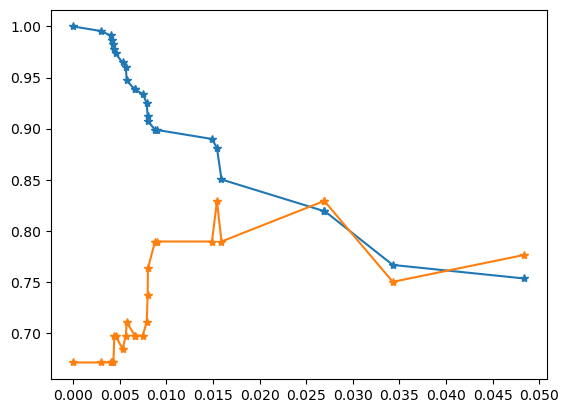

In [48]:
train = [i.score(X_train,y_train)   for i in models]
test = [j.score(X_test,y_test)  for j in models]

plt.plot(alpha_values,train,marker = '*')
plt.plot(alpha_values,test,marker = '*')
plt.xticks(np.arange(0,0.051,0.005))
plt.show()

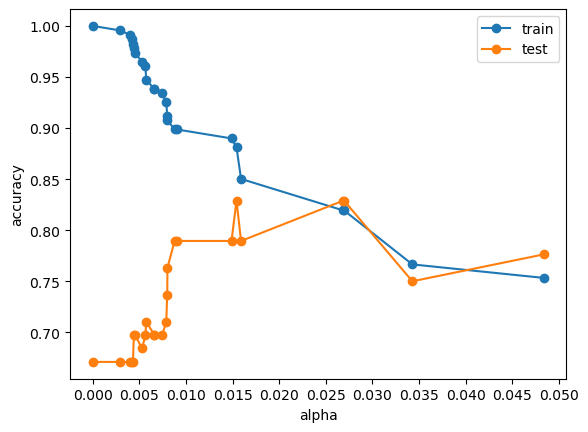

In [50]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]


plt.plot(ccp_alphas,train_scores,marker='o',label='train')
plt.plot(ccp_alphas,test_scores,marker='o',label='test')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045,0.05])

plt.legend()
plt.show()

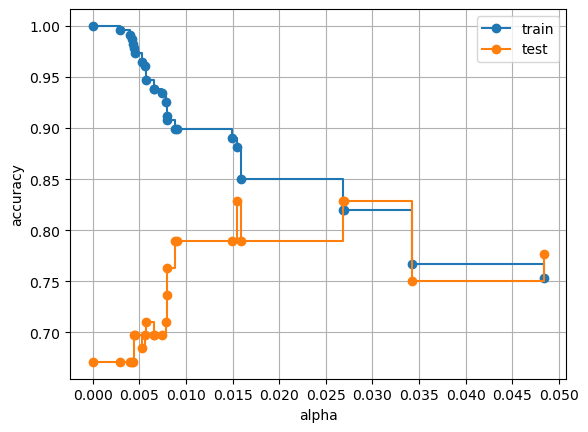

In [70]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]


plt.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045,0.05])
plt.grid()
plt.legend()
plt.show()

In [51]:
model3 = DecisionTreeClassifier(random_state=42,ccp_alpha=0.027)

In [52]:
model3.fit(X_train,y_train)
train_score = model3.score(X_train,y_train)
test_score = model3.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.82, Testing Score 0.83


In [56]:
ytest_pred = model3.predict(X_test)

confusion_matrix(y_test,ytest_pred)

array([[36,  3],
       [10, 27]], dtype=int64)

In [57]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        39
           1       0.90      0.73      0.81        37

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



In the graph above, we see that the accuracy for the **Testing Dataset** hits its maximum value when alpha is about **0.027**. After this value for alpha, the accuracy of the Training Dataset drops off and that suggests we should set **ccp_alpha=0.027**

**Note**: When we apply **Cost Complexity Pruning** to a **Classification Tree**, values for alpha go from **0 to 1**, and the values of alpha for **Regression Tree** can be much larget it can go from **0 to positive infinity**.

Since there are many ways we could have divided the original dataset into **Training** and **Testing** datasets, how do we used the best **Training Dataset** and how do we know we used the best **Testing Dataset?** Typically, we answer this questions with **10-Fold Cross Validation.** So that's what we're going to do now, and we'll do it with the **Cross_validation  using cross_val_score()** function.

## Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha

The graph we just drew suggested one values for alpha, 0.027, but another set of data might suggest another optimal value.

Now will try with different train and test set using cross validation

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(model3,X_train,y_train,cv=10)

array([0.65217391, 0.82608696, 0.7826087 , 0.86956522, 0.7826087 ,
       0.7826087 , 0.82608696, 0.68181818, 0.81818182, 0.81818182])

<Axes: xlabel='tree'>

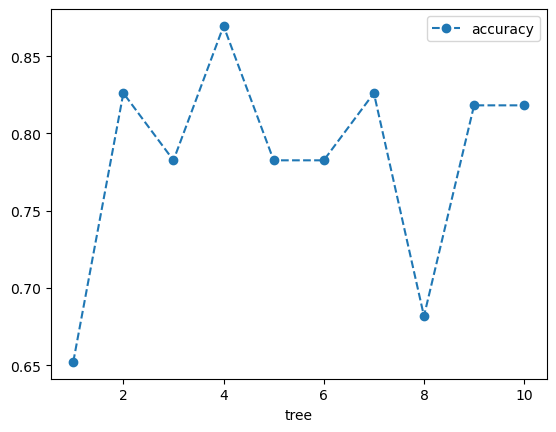

In [61]:
# now use 10-fold cross validation create 10 different training and testing datasets that are then used to train and test tree.
## Note:- We use 10-fold because we don't have tons of data..
scores=cross_val_score(model3,X_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(1,11),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [62]:
scores.mean()

0.7839920948616601

In [63]:
scores

array([0.65217391, 0.82608696, 0.7826087 , 0.86956522, 0.7826087 ,
       0.7826087 , 0.82608696, 0.68181818, 0.81818182, 0.81818182])

The graph above shows that using different **Training** and **Testing** data with the same alpha resulted in different accuracies, suggesting that alpha is positive to the datasets. So, insted of picking a single **Training** dataset and single **Testing** dataset, let's use **Cross Validation** to find the optimal value or ccp_alpha.

In [51]:
ccp_alphas

array([0.        , 0.00293686, 0.00400481, 0.00416055, 0.00430517,
       0.00440529, 0.00453878, 0.00528634, 0.0056478 , 0.00572687,
       0.00660793, 0.00660793, 0.00744519, 0.00788314, 0.00798279,
       0.00800961, 0.00877544, 0.00899446, 0.01488222, 0.0154185 ,
       0.01590662, 0.02686878, 0.02695892, 0.03428884, 0.04838798])

In [70]:
alpha_results.mean_accuracy.max()

0.7621256038647343

In [83]:
y_train.value_counts()

hd
0    125
1    102
Name: count, dtype: int64

In [72]:
alpha_results.sort_values('mean_accuracy',ascending = False)

,alpha,mean_accuracy,std
20,0.015907,0.762126,0.060116
19,0.015419,0.762126,0.060116
18,0.014882,0.762126,0.060116
17,0.008994,0.761836,0.064332
12,0.007445,0.757391,0.071039
16,0.008775,0.757391,0.068327
14,0.007983,0.753043,0.065847
15,0.008010,0.753043,0.065847
13,0.007883,0.753043,0.065847
23,0.034289,0.740193,0.046178


In [66]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.735459,0.072367
1,0.002937,0.735459,0.072367
2,0.004005,0.735459,0.072367
3,0.004161,0.735459,0.072367
4,0.004305,0.735459,0.072367
5,0.004405,0.735459,0.072367
6,0.004539,0.735459,0.072367
7,0.005286,0.735459,0.072367
8,0.005648,0.739903,0.067135
9,0.005727,0.739903,0.067135


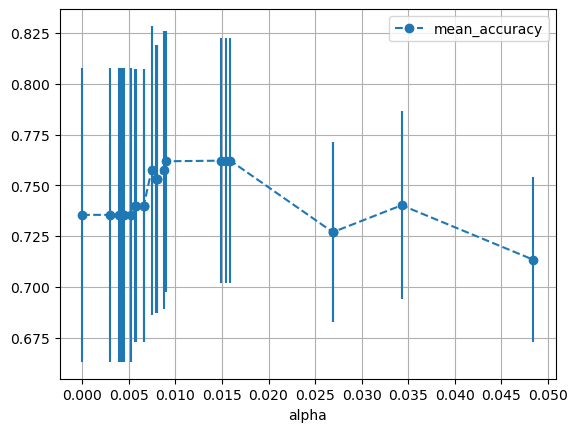

In [64]:
# create an array to store the results of each fold during cross validations
alpha_loop_values=[]

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (The accuracy) for each call to cross_val_score in alpha_loop_values

for i in ccp_alphas:
    model4=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores=cross_val_score(model4,X_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores for each candidate  value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.xticks([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045,0.05])
plt.grid()
plt.show()

In [54]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.735459,0.072367
1,0.002937,0.735459,0.072367
2,0.004005,0.735459,0.072367
3,0.004161,0.735459,0.072367
4,0.004305,0.735459,0.072367
5,0.004405,0.735459,0.072367
6,0.004539,0.735459,0.072367
7,0.005286,0.735459,0.072367
8,0.005648,0.739903,0.067135
9,0.005727,0.739903,0.067135


Using cross validation, we can see that the alpha value for 0.015 the average accuracy will be 76%

In [55]:
alpha_results[(alpha_results['alpha']>0.015) & (alpha_results['alpha']<0.0156)]['alpha'].values

array([0.0154185])

### Now will find the ideal CCP value

In [56]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.015) & (alpha_results['alpha']<0.0155)]['alpha']
ideal_ccp_alpha

19    0.015419
Name: alpha, dtype: float64

In [57]:
ideal_ccp_alpha.values

array([0.0154185])

#### Now we got the ideal value for alpha and we can build, evaluate and draw the final classification Tree

## Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

Now that we have the ideal value for alpha we can build the final **Classification Tree** by setting ccp_alpha=ideal_ccp_alpha.

In [88]:
## Build and train a new decision tree, only this time use the optimal value for alpha

model5=DecisionTreeClassifier(random_state=42,ccp_alpha= 0.015419)

In [89]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015419, random_state=42)

In [90]:
# Predicting for training and testing 
ytrain_pred = model5.predict(X_train)
ytest_pred = model5.predict(X_test)

In [91]:
# Model Evaluation

train_score = model5.score(X_train,y_train)
test_score = model5.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.88, Testing Score 0.83


In [95]:
confusion_matrix(y_train,ytrain_pred)

array([[117,   8],
       [ 19,  83]], dtype=int64)

In [96]:
confusion_matrix(y_test,ytest_pred)

array([[33,  6],
       [ 7, 30]], dtype=int64)

In [99]:
print(y_train.value_counts(),y_test.value_counts())

hd
0    125
1    102
Name: count, dtype: int64 hd
0    39
1    37
Name: count, dtype: int64


In [97]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       125
           1       0.91      0.81      0.86       102

    accuracy                           0.88       227
   macro avg       0.89      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227



In [65]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.83      0.81      0.82        37

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



### We see that pruned tree is better classifing over full sized tree.

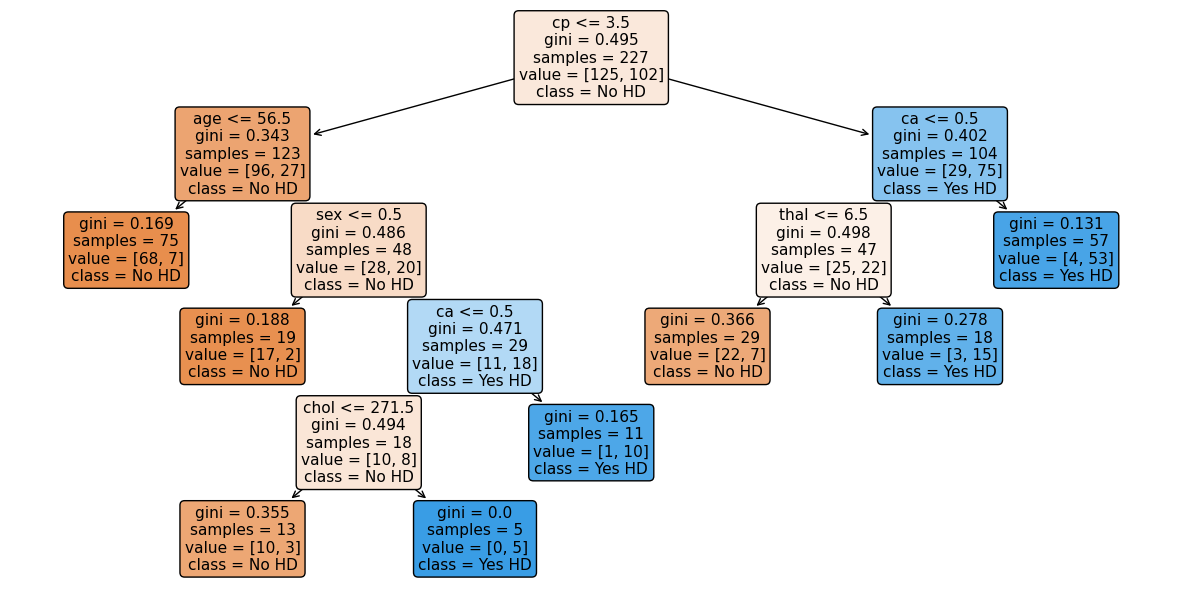

In [66]:
plt.figure(figsize=(15,7.5))
plot_tree(model5,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()